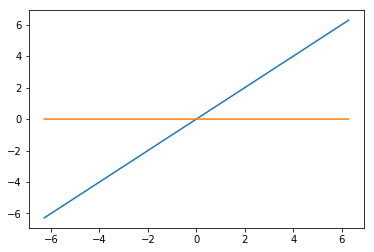

In [303]:
class FunctionType:
        
    def __init__(self, f):
        self.f = f
        
    def __call__(self, *args, **kwargs):
        return self.f(*args, **kwargs)
    
    def __add__(self, other):
        other = Function(other)
        def operator(*args, **kwargs): return self(*args, **kwargs) + other(*args, **kwargs)
        return FunctionType(operator)
    
    def __sub__(self, other):
        other = Function(other)
        def operator(*args, **kwargs): return self(*args, **kwargs) - other(*args, **kwargs)
        return FunctionType(operator)
    
    def __mul__(self, other):
        other = Function(other)
        def operator(*args, **kwargs): return self(*args, **kwargs) * other(*args, **kwargs)
        return FunctionType(operator)
    
    def __div__(self, other):
        other = Function(other)
        def operator(*args, **kwargs): return self(*args, **kwargs) / other(*args, **kwargs)
        return FunctionType(operator)
    
    def __pow__(self, other):
        other = Function(other)
        def operator(*args, **kwargs): return self(*args, **kwargs) ** other(*args, **kwargs)
        return FunctionType(operator)
    
    def __matmul__(self, other):
        other = Function(other)
        def operator(*args, **kwargs): return self(other(*args, **kwargs))
        return FunctionType(operator)


def Function(f):
    if isinstance(f, FunctionType):
        return f
    elif callable(f):
        return FunctionType(f)
    else:
        def scalar_wrapper(*args, **kwargs):
            return f
        return FunctionType(scalar_wrapper)
    

def bind(**bound_kwargs):
    def decorator(f):
        def decorated(*args, **kwargs):
            kwargs.update(bound_kwargs)
            return f(*args, **kwargs)
        return decorated
    return decorator
    

@Function
def I(x):
    return x
    
@Function
def f(*args, **kwargs):
    return 3


%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *

sin = Function(sin)
cos = Function(cos)

t = arange(-2*pi, 2*pi, 0.0001)

f = sin

@Function
def shsc(x, b, a):
    return a*x+b
    
f = I
shsc = bind(b=0, a=0)(shsc)

plt.plot(t, f(t), t, (f@shsc)(t))

In [248]:

        

def fn(a,b):
    return a+b

fn = bind(a=2, b=3)(fn)

fn()

5

In [258]:
def f(a, *args, **kwargs):
    print('Args',  args)
    print('kwArgs',  kwargs)
    
f(3)

Args ()
kwArgs {}
